In [ ]:
import urllib, json
import pandas as pd


In [ ]:
df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')

***There are ﬁve variables in the data frame:***

**rating:** Bechdel Score of the movie from 0 to 3. A Bechdel score lower than 3 means the movie failed the Bechdel test, and a Bechdel score of 3 means the movie passed.

**imdbid:** The movie's IMDB number

**title:** Movie title
**id:** Unique movie ID

**year:** Year the movie was released

In [ ]:
df.head()

imdbid  rating  year                       title    id
0   3155794       0  1874            Passage de Venus  9602
1  14495706       0  1877           La Rosace Magique  9804
2   2221420       0  1878  Sallie Gardner at a Gallop  9603
3  12592084       0  1878           Le singe musicien  9806
4   7816420       0  1881     Athlete Swinging a Pick  9816

*Taking a look at the column **'year'**, you can see that there are
movies present from the 19th century, and a lot of those movies have a Bechdel score of 0.*

In [ ]:
 df['year']>=1967

0        False
1        False
2        False
3        False
4        False
         ...  
10178     True
10179     True
10180     True
10181     True
10182     True
Name: year, Length: 10183, dtype: bool

*I am going to create a new data frame with movies released after
the year 1967, and will be using this new data frame for the rest
of my analysis.*

In [ ]:
df_1 = df[df['year']>=1967]

In [ ]:
df_1.head()

imdbid  rating  year             title    id
1326   61512       1  1967    Cool Hand Luke   301
1327   61852       1  1967  Jungle Book, The   493
1328   61722       2  1967     Graduate, The   616
1329   63278       1  1967  Marketa Lazarova  2054
1330   61418       3  1967  Bonnie and Clyde  2083

In [ ]:
#renaming the column ‘rating’ to ‘Bechdel Score’,

df_1.rename(columns={'rating':'Bechdel Score'}, inplace=True)

In [ ]:
df_1.head()

imdbid  Bechdel Score  year             title    id
1326   61512              1  1967    Cool Hand Luke   301
1327   61852              1  1967  Jungle Book, The   493
1328   61722              2  1967     Graduate, The   616
1329   63278              1  1967  Marketa Lazarova  2054
1330   61418              3  1967  Bonnie and Clyde  2083

In [ ]:
#converting the 'year' column into a datetime object.

df_1['year'] = pd.to_datetime(df_1['year'], format='%Y')


In [ ]:
 #Changing Bechdel Scores to categorical variables.

df_1['Bechdel Score'] = df_1['Bechdel Score'].astype('category',copy=False)


In [ ]:
df_1.head()

imdbid Bechdel Score       year             title    id
1326   61512             1 1967-01-01    Cool Hand Luke   301
1327   61852             1 1967-01-01  Jungle Book, The   493
1328   61722             2 1967-01-01     Graduate, The   616
1329   63278             1 1967-01-01  Marketa Lazarova  2054
1330   61418             3 1967-01-01  Bonnie and Clyde  2083

**Data Visualization.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<Axes: xlabel='Bechdel Score', ylabel='count'>

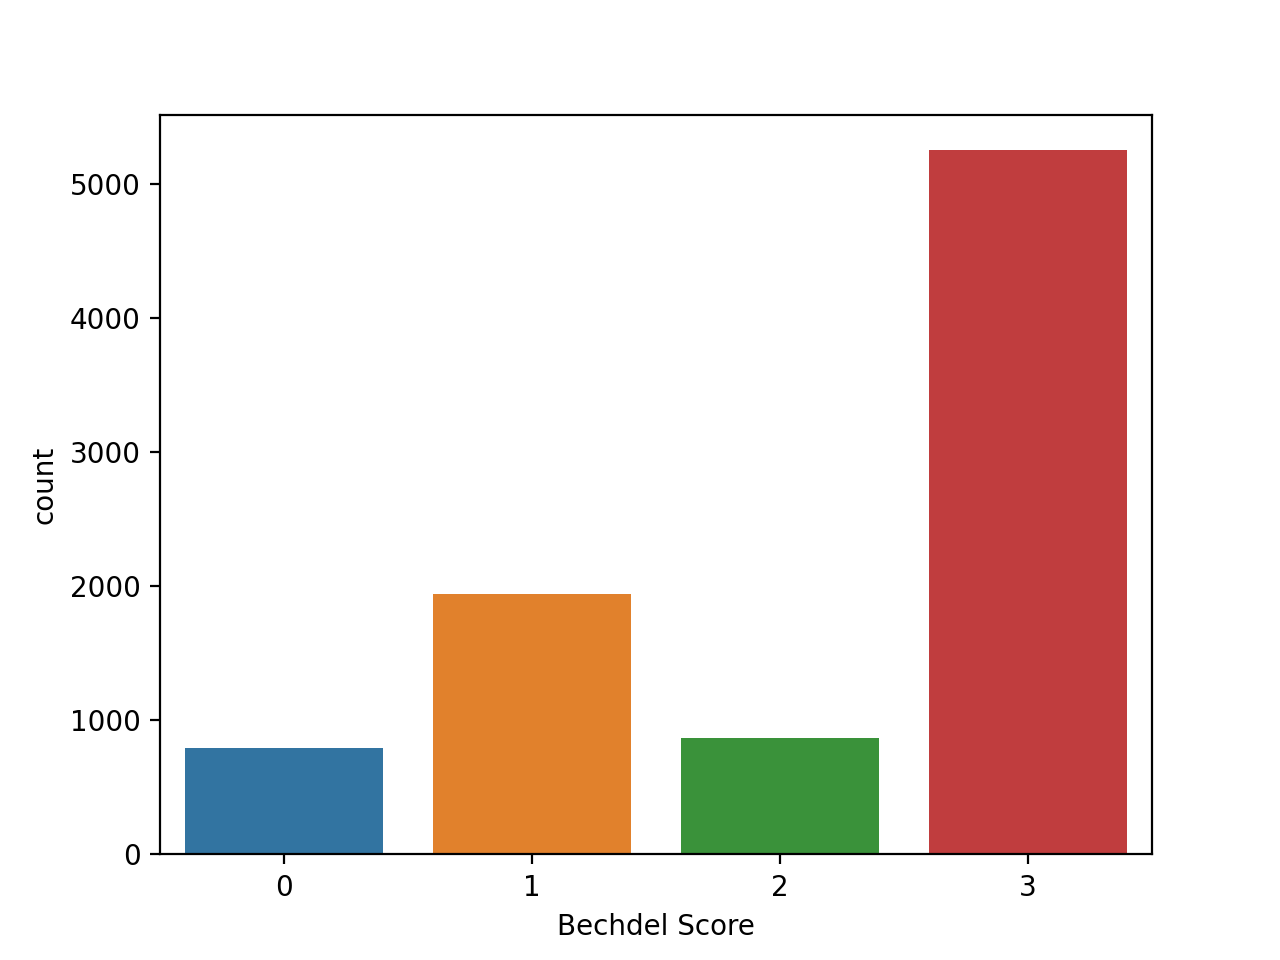

In [ ]:
#Counting Bechdel scores using Scatter Plot

sns.countplot(x='Bechdel Score',data=df_1)

In [ ]:
li = []
for i in df_1['Bechdel Score']:
    if(i<3):
        li.append(0)
    else:
        li.append(1)
df_1['pass_test'] = li

Most movies after the year 1967 seem to have higher Bechdel scores, but do they
pass the Bechdel test...

There is a dataframe called pass test, with a **value of 1** for all the movies
that pass the Bechdel test, and **a value of 0** for the movies that don't.

<Axes: xlabel='pass_test', ylabel='count'>

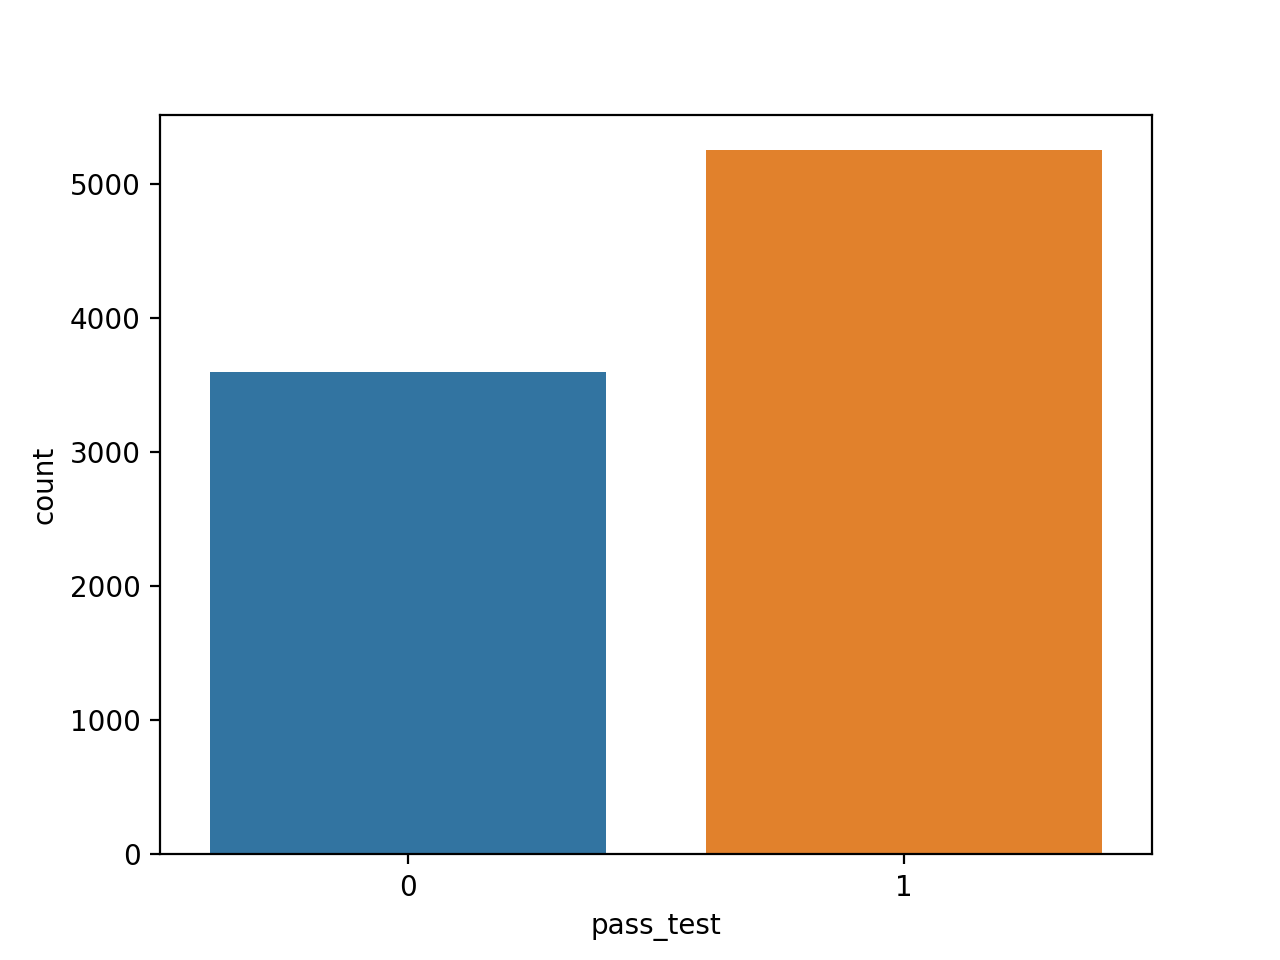

In [ ]:
sns.countplot(x='pass_test',data=df_1)

*Analysing the Bachdel Score using Plotine Library for better understanding*

In [ ]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()
py.init_notebook_mode()

In [ ]:
df_by_date = df_1.loc[df_1['year'].sort_values().index]
by_date = df_by_date.groupby('year').year.count()
by_date.iplot(kind='scatter', title='Number of movies with year',name='rating')

In [ ]:
from plotnine import *

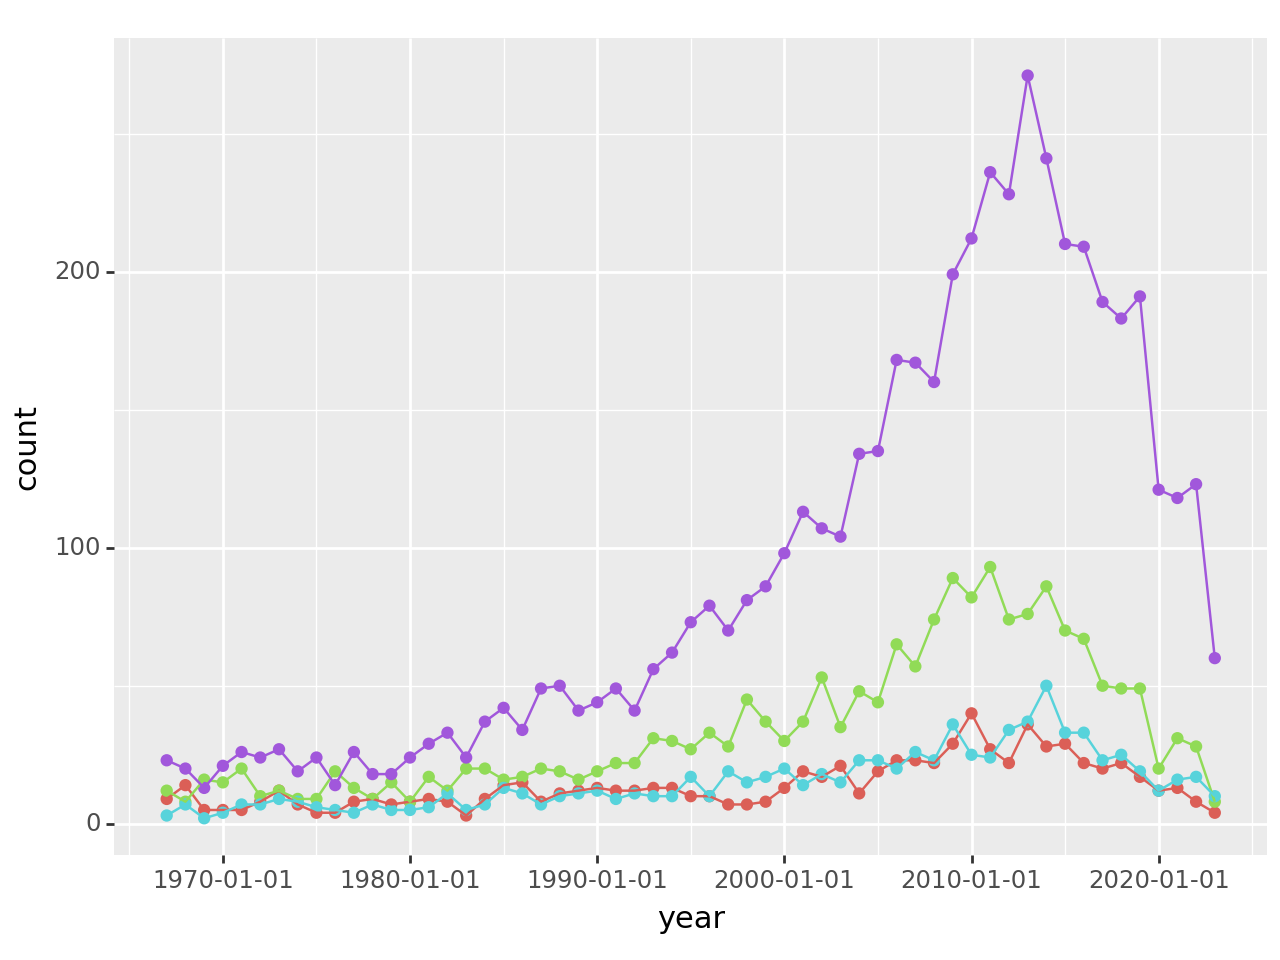

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(df_1)+geom_point(aes('year',color=df_1['Bechdel Score']),stat='count',show_legend=False)+geom_line(aes('year',color=df_1['Bechdel Score']),stat='count',show_legend=False))

In the 1970s and 1980s, there were a few movies that passed the Bechdel test.

During this time, there was no significant difference between movies that passed the test and movies that didn't.

The years following the 1980s and 1990s saw a spike in the number of movies that passed the Bechdel test, and there is massive improvement going into the21st century.

*Now, I want to visualize the relationship between IMDB rating and the Bechdel scores. Are movies with higher Bechdel scores more likely to have higher IMDB
ratings, or is it the other way round?*

In [ ]:
imdb = pd.read_csv('movies.csv')
imdb_1 = imdb[['title','rating']]
df_1 = pd.merge(df_1, imdb_1, how='left', left_on=['title'], right_on=['title'])
df_1.head()

imdbid Bechdel Score       year             title    id  pass_test  rating
0   61512             1 1967-01-01    Cool Hand Luke   301          0     8.2
1   61852             1 1967-01-01  Jungle Book, The   493          0     7.5
2   61852             1 1967-01-01  Jungle Book, The   493          0     5.9
3   61722             2 1967-01-01     Graduate, The   616          0     8.2
4   63278             1 1967-01-01  Marketa Lazarova  2054          0     NaN

In [ ]:
# Dropping rows with null values:
df_1 = df_1.dropna()
df_1 = df_1.drop('id',axis=1)
# Creating a new dataframe with only year, Bechdel scores, and imdb rating:
new = df_1.groupby(['year','Bechdel Score']).agg({'rating':'mean'}).reset_index()

In [ ]:
new.head()

year Bechdel Score    rating
0 1967-01-01             0  7.050000
1 1967-01-01             1  6.844444
2 1967-01-01             2  6.000000
3 1967-01-01             3  6.514286
4 1968-01-01             0  7.262500

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


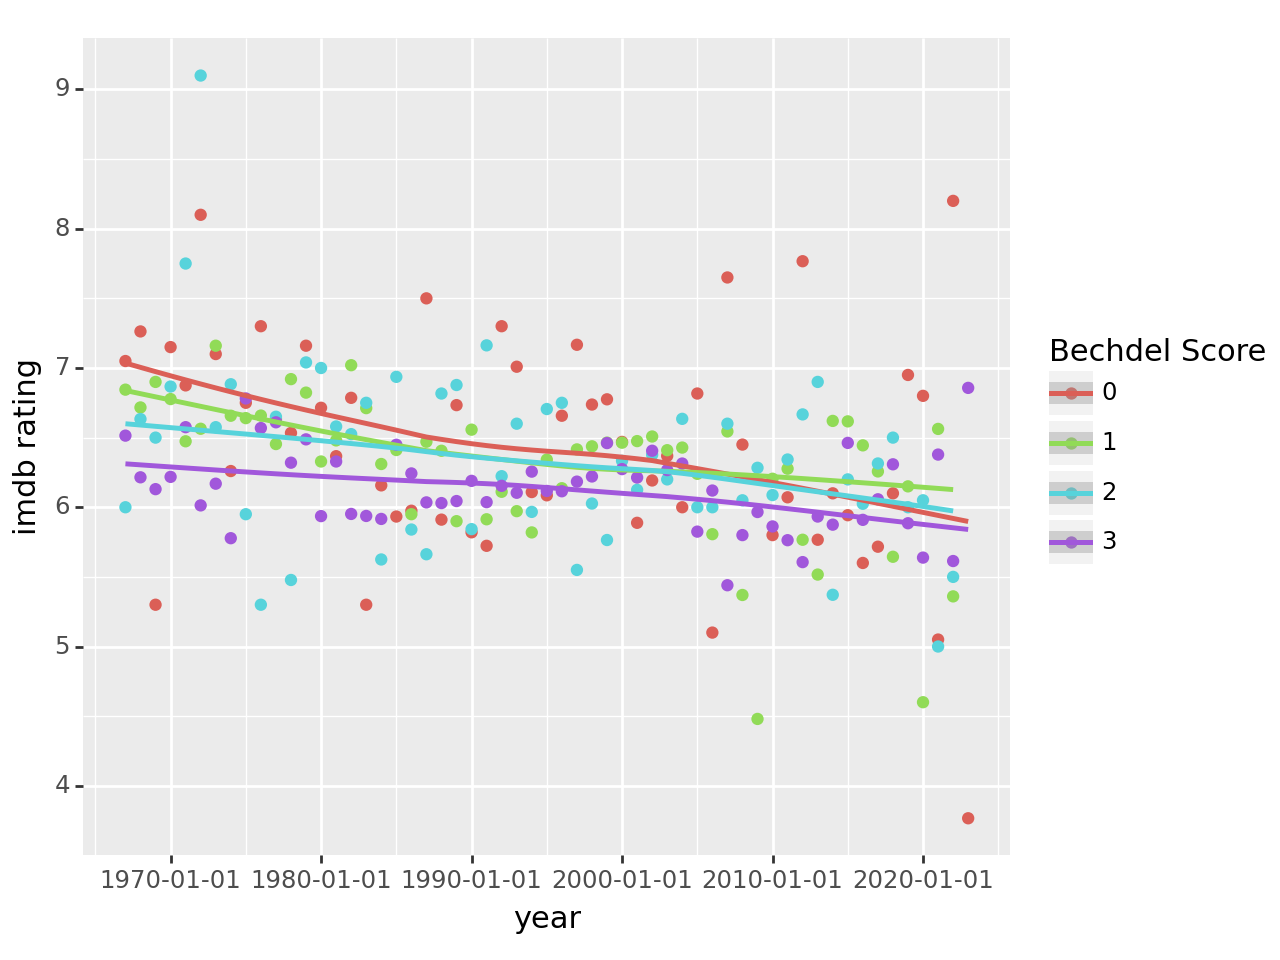

<Figure Size: (640 x 480)>

In [ ]:
# Plot year against IMDB rating and Bechdel Score:
ggplot(new,aes(x='year',y='rating',color='Bechdel Score'))+ geom_point()+geom_smooth()+scale_y_continuous(name="imdb rating")+labs(colour='Bechdel Score')

**I will use a different movie dataset from Kaggle.**

In [ ]:
!pip install gender-guesser

import gender_guesser.detector as gen

In [ ]:
latest = pd.read_csv('movielatest.csv',encoding = "latin")

In [ ]:
dfLatest = latest[['name','director']]
dfLatest.head()

name        director
0               Stand by Me      Rob Reiner
1  Ferris Bueller's Day Off     John Hughes
2                   Top Gun      Tony Scott
3                    Aliens   James Cameron
4   Flight of the Navigator  Randal Kleiser

In [ ]:
dfLatest.rename(columns={'name':'title'}, inplace=True)
dfLatest = pd.merge(df_1, dfLatest, how='left', left_on=['title'], right_on=['title'])

In [ ]:
dfLatest = dfLatest.dropna()
dfLatest.head()

imdbid Bechdel Score       year               title  pass_test  rating  \
7    61452             2 1967-01-01       Casino Royale          0     5.3   
11   61391             3 1967-01-01           Bedazzled          1     6.8   
12   61391             3 1967-01-01           Bedazzled          1     5.9   
29   63442             1 1968-01-01  Planet of the Apes          0     7.9   
30   63442             1 1968-01-01  Planet of the Apes          0     5.6   

           director  
7   Martin Campbell  
11     Harold Ramis  
12     Harold Ramis  
29       Tim Burton  
30       Tim Burton

In [ ]:
# Predicting gender of director from first name:
d = gen.Detector()
genders = []
firstNames = dfLatest['director'].str.split().str.get(0)
for i in firstNames[0:len(firstNames)]:
    if d.get_gender(i) == 'male':
        genders.append('male')
    elif d.get_gender(i) == 'female':
        genders.append('female')
    else:
        genders.append('unknown')
dfLatest['gender'] = genders
dfLatest = dfLatest[dfLatest['gender'] != 'unknown']


In [ ]:
# Encode the variable gender into a new dataframe:
dfLatest['Male'] = dfLatest['gender'].map( {'male':1, 'female':0} )
dfLatest.head()

imdbid Bechdel Score       year               title  pass_test  rating  \
7    61452             2 1967-01-01       Casino Royale          0     5.3   
11   61391             3 1967-01-01           Bedazzled          1     6.8   
12   61391             3 1967-01-01           Bedazzled          1     5.9   
29   63442             1 1968-01-01  Planet of the Apes          0     7.9   
30   63442             1 1968-01-01  Planet of the Apes          0     5.6   

           director gender  Male  
7   Martin Campbell   male     1  
11     Harold Ramis   male     1  
12     Harold Ramis   male     1  
29       Tim Burton   male     1  
30       Tim Burton   male     1

It appears as though almost all the movies in the dataset have male directors. Again, this was something I expected, since Hollywood is known to employ a very small number of female directors.

*The data frame has two additional variables; gender and male. Gender represents the gender of the director. The variable male has a value of 1 if the director is male, and 0 if she is female.*

<Axes: xlabel='gender', ylabel='count'>

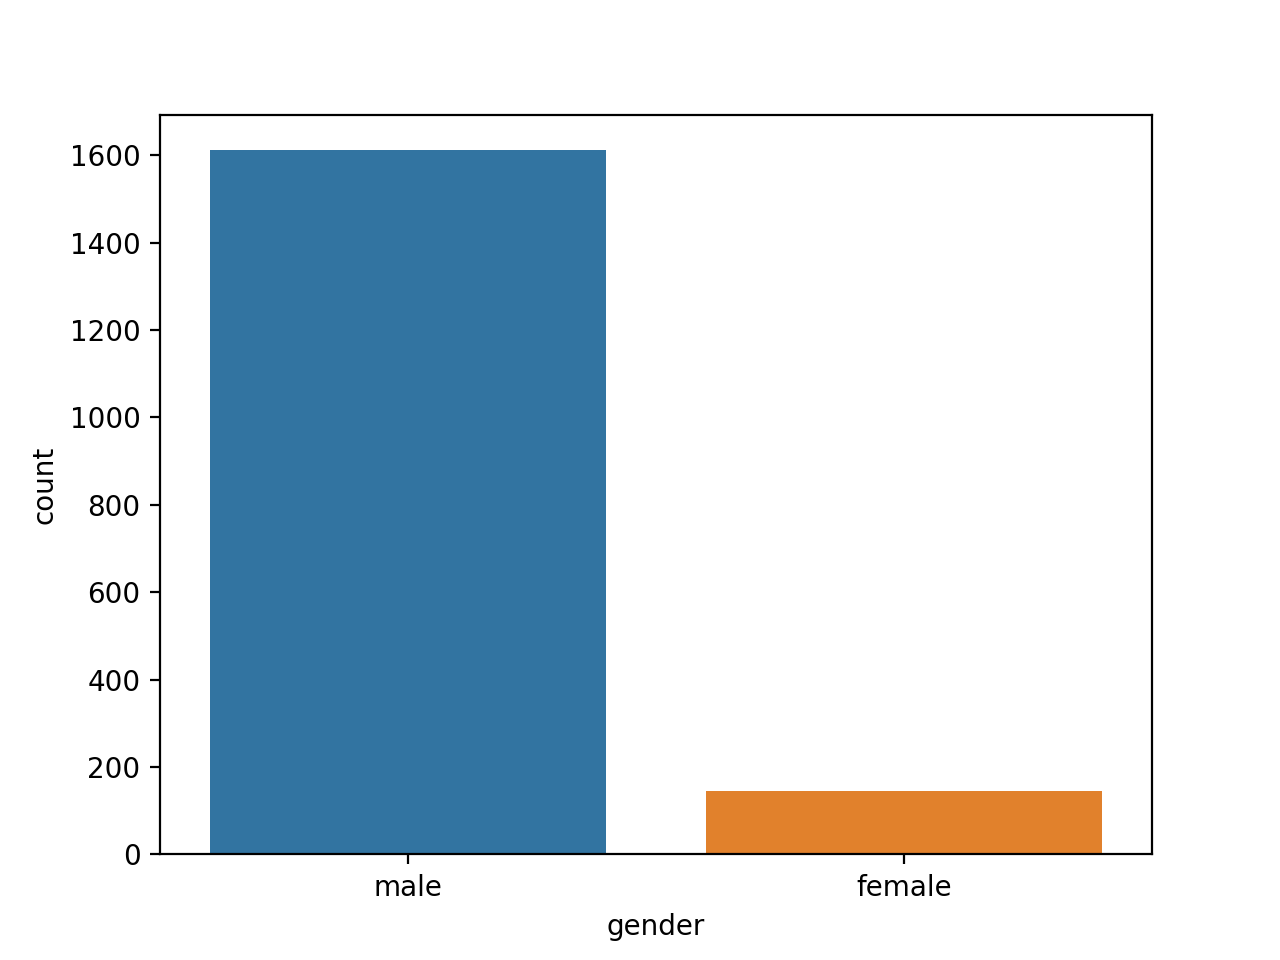

In [ ]:
# Visualize gender:

sns.countplot(x='gender',data=dfLatest)

I will visualize the gender of the director with the Bechdel score, to see if movies with female directors have a higher score.

<Axes: xlabel='Bechdel Score', ylabel='count'>

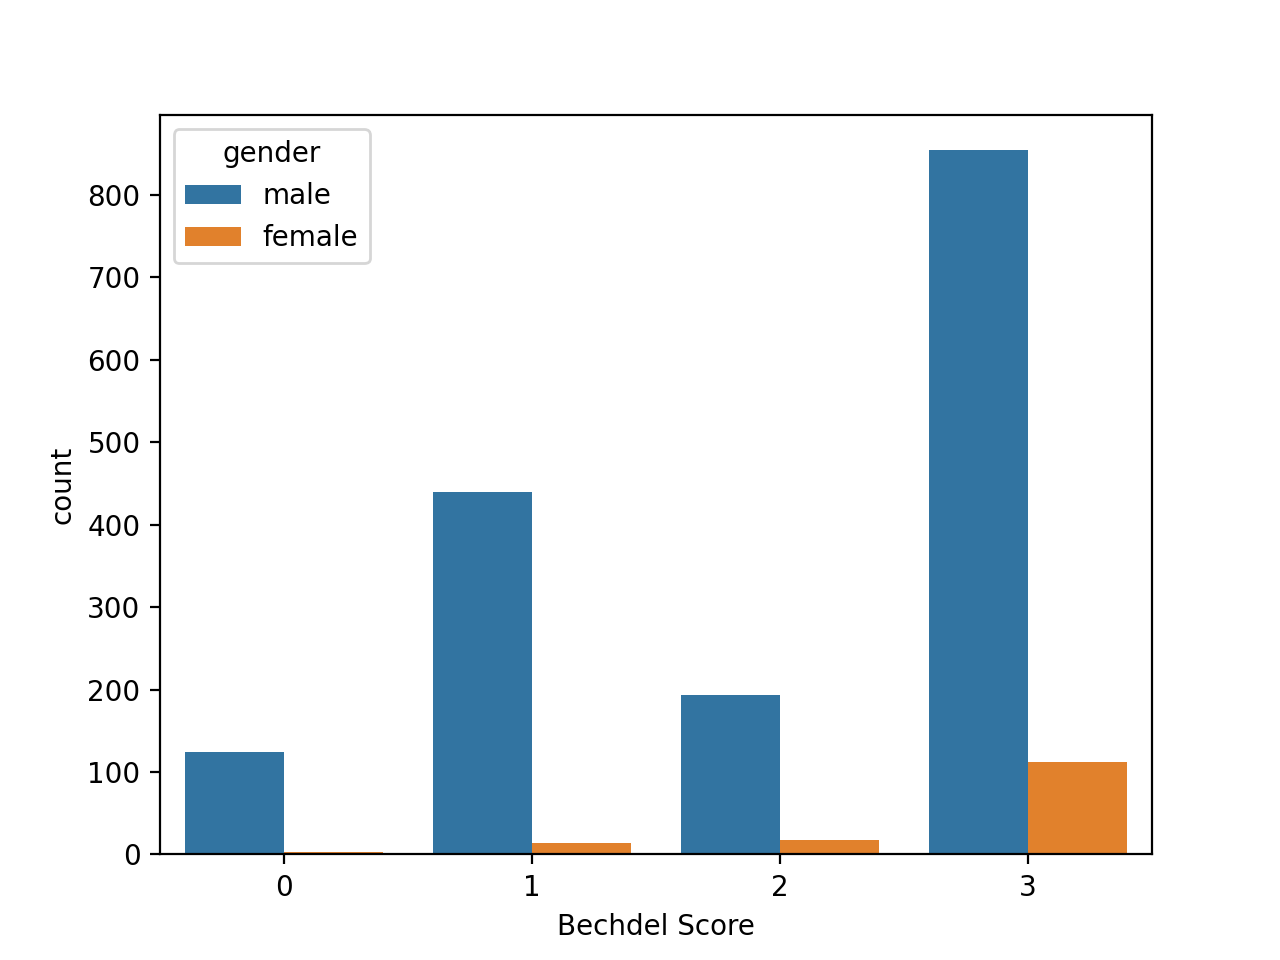

In [ ]:
# Visualize gender with Bechdel Score:

sns.countplot(x='Bechdel Score',hue='gender',data=dfLatest)

In [ ]:
ggplot(aes(x = 'year', y = 'Bechdel Score',color='gender'), data = dfLatest)+geom_point()

TypeError: ignored

In [ ]:
# Add variable budget:
dfLatest['budget']=latest['budget']


In [ ]:
# Visualize budget and Bechdel score:
ggplot(aes(x = 'year', y = 'budget',color='Bechdel Score'), data = dfLatest)+geom_point()+geom_smooth()


TypeError: ignored

In [ ]:
# Visualize budget and gender of director
ggplot(aes(x = 'year', y = 'budget',color='gender'), data = dfLatest)+geom_point()+geom_smooth()


TypeError: ignored

Visualizing the relationship between a movie's budget,Bechdel score, and gender of director:

<Axes: xlabel='Bechdel Score', ylabel='budget'>

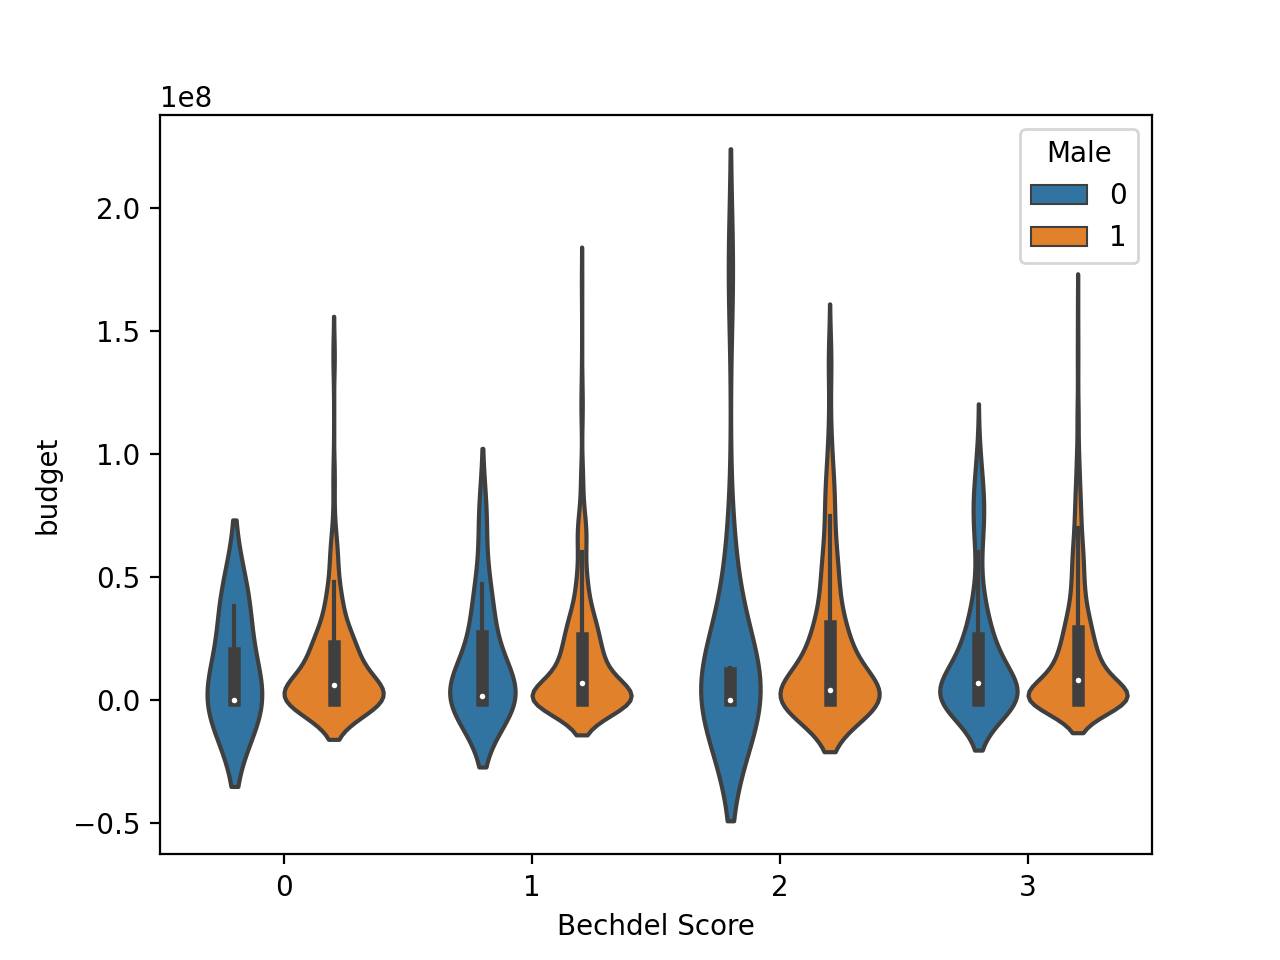

In [ ]:
#Visualize budget, score, and gender
sns.violinplot(x='Bechdel Score',y='budget',hue='Male',data=dfLatest)


In [ ]:
# Visualize genre and Bechdel score

dfLatest['genre'] = latest['genre']
ggplot(aes(x = 'year', y = 'genre',color='Bechdel Score'), data = dfLatest)+geom_point()


TypeError: ignored

<Axes: xlabel='Bechdel Score', ylabel='gross'>

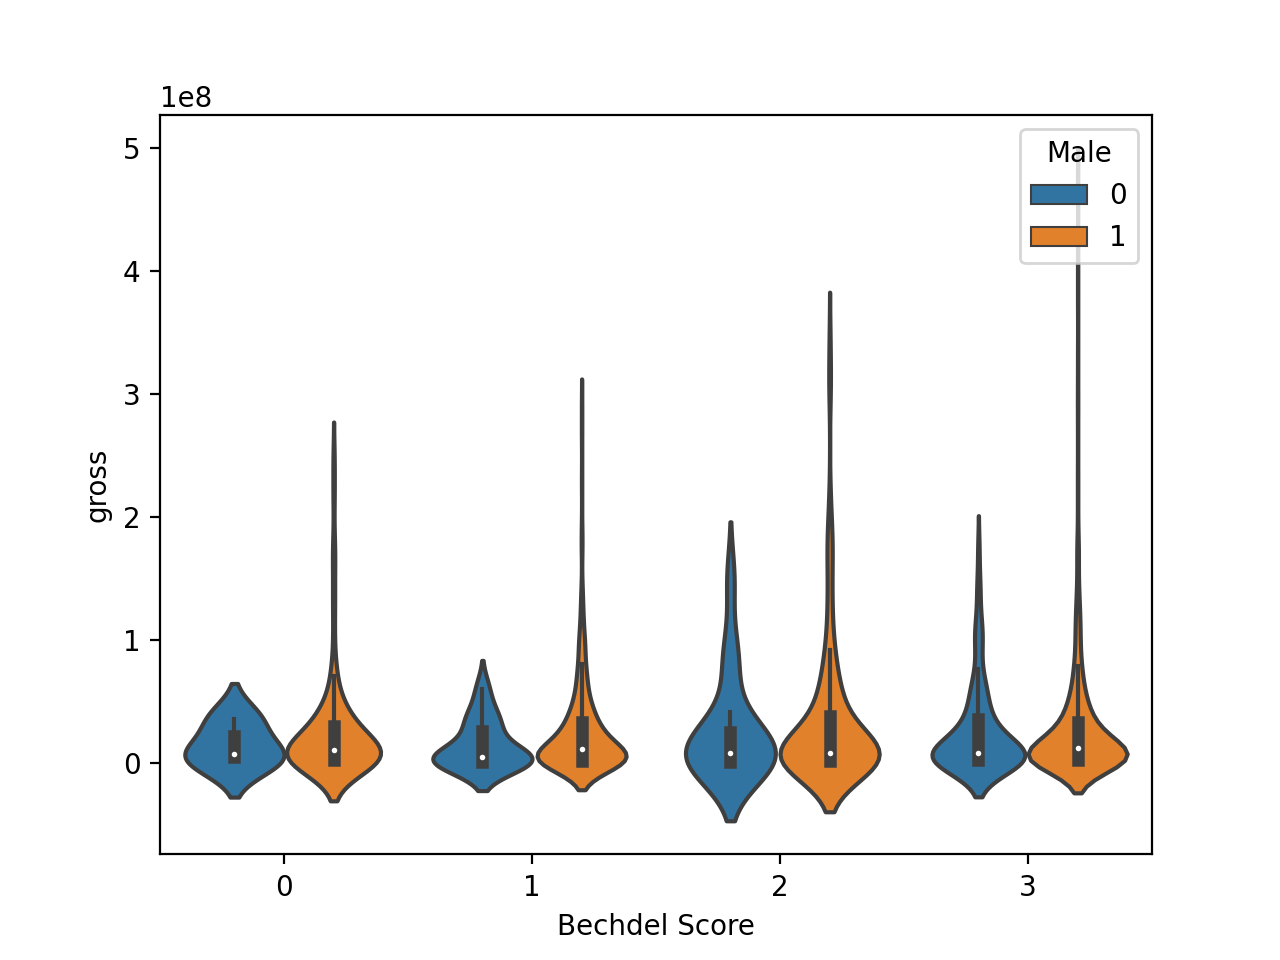

In [ ]:
# Visualize movie grossing, gender, and Bechdel score:
dfLatest['gross'] = latest['gross']
sns.violinplot(x='Bechdel Score',y='gross',hue='Male',data=dfLatest)


In [ ]:
# Movie grossing with year and gender:

ggplot(aes(x = 'year', y = 'gross',color='gender'), data = dfLatest)+geom_point()


TypeError: ignored

And that's it! I managed to visualize relationships and answer all the data questions I set out to find answers to.
Some interesting data findings include:
1. Movies that fail the Bechdel test tend to have higher IMDB ratings.
2. Over the years, there has been an increasing number of movies that pass the
Bechdel test.
3. Movies with female directors have higher Bechdel scores.
4. There is no clear correlation between the budget or revenue of a movie and
its Bechdel score.

Of course, this analysis was only done with the data I gathered from three places, and might not represent the entire population of movies out there.

Finally, I would like to mention that the Bechdel test is not necessarily the best benchmark to measure female representation in movies. It does not take into
consideration how well written a female character is, neither does it measure meaningful depth of character.

However, it is one of the most well-known metrics used to expose gender bias and is the only test we have this kind of data on.